In [1]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'1.0.0'

In [ ]:
# make query an unambiguous dict to help the geocoder find specifically what you're looking for
place = {'city' : 'Merida',
         'state' : 'Yucatan',
         'country' : 'Mexico'}

## Drive road network

get drivable public streets (but not service roads)

In [2]:
# download and project a street network
G = ox.graph_from_place(place, network_type='drive')

In [3]:
G_proj = ox.project_graph(G)

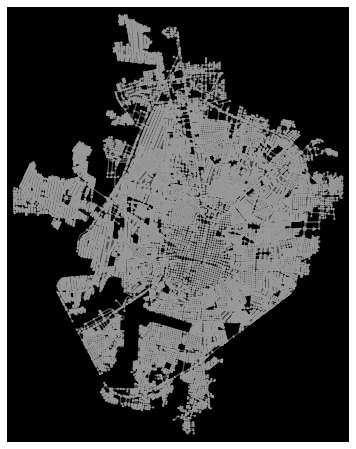

In [4]:
fig, ax = ox.plot_graph(G_proj, bgcolor='k', node_size=5, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1, edge_alpha=1)

In [7]:
# what sized area does our network cover in square meters?
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

288838097.0044408

In [8]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')

{'n': 26150,
 'm': 71656,
 'k_avg': 5.48038240917782,
 'intersection_count': 24418,
 'streets_per_node_avg': 3.2349521988527723,
 'streets_per_node_counts': {0: 0,
  1: 1732,
  2: 69,
  3: 14811,
  4: 9407,
  5: 123,
  6: 8},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.06623326959847037,
  2: 0.002638623326959847,
  3: 0.5663862332695985,
  4: 0.3597323135755258,
  5: 0.004703632887189293,
  6: 0.00030592734225621415},
 'edge_length_total': 6485381.344000022,
 'edge_length_avg': 90.50716400580582,
 'street_length_total': 3836009.426000017,
 'street_length_avg': 91.20109902284818,
 'street_segments_count': 42061,
 'node_density_km': 90.53514848353939,
 'intersection_density_km': 84.53870958589158,
 'edge_density_km': 22453.344663534157,
 'street_density_km': 13280.829176564752,
 'circuity_avg': 1.0203726978459875,
 'self_loop_proportion': 0.00030702244054929106,
 'clean_intersection_count': 19037,
 'clean_intersection_density_km': 65.90889566658277}

In [10]:
# save graph to disk as shapefile (for GIS) or graphml file (for gephi etc)
ox.save_graph_shapefile(G, filepath='networks/drive_road_network_shapefiles', directed=True)
ox.save_graphml(G, filepath='networks/drive_road_network.graphml', gephi=True)
ox.save_graph_geopackage(G, filepath='networks/drive_road_network.gpkg', directed=True)

## Drive service road network

get drivable public streets including service roads

In [11]:
# download and project a street network
G_service = ox.graph_from_place(place, network_type='drive_service')

In [12]:
G_service_proj = ox.project_graph(G_service)

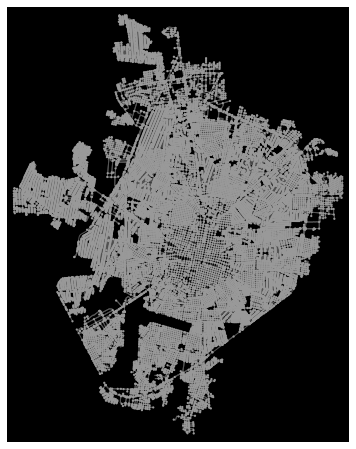

In [13]:
fig, ax = ox.plot_graph(G_service_proj, bgcolor='k', node_size=5, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1, edge_alpha=1)

In [19]:
# what sized area does our network cover in square meters?
nodes_proj = ox.graph_to_gdfs(G_service_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

288980415.48835397

In [20]:
# show some basic stats about the network
ox.basic_stats(G_service_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')

{'n': 27636,
 'm': 75030,
 'k_avg': 5.42987407729049,
 'intersection_count': 25660,
 'streets_per_node_avg': 3.2106672456216527,
 'streets_per_node_counts': {0: 0,
  1: 1976,
  2: 85,
  3: 15860,
  4: 9579,
  5: 128,
  6: 8},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.07150094080185265,
  2: 0.0030756983644521637,
  3: 0.5738891301201332,
  4: 0.34661311333043854,
  5: 0.004631639889998552,
  6: 0.0002894774931249095},
 'edge_length_total': 6648883.925000028,
 'edge_length_avg': 88.61633913101463,
 'street_length_total': 3923886.3550000233,
 'street_length_avg': 88.91652741898987,
 'street_segments_count': 44130,
 'node_density_km': 95.63277827425556,
 'intersection_density_km': 88.7949446561513,
 'edge_density_km': 23008.077947994992,
 'street_density_km': 13578.381595060575,
 'circuity_avg': 1.0237547779438863,
 'self_loop_proportion': 0.0007463681194188991,
 'clean_intersection_count': 19489,
 'clean_intersection_density_km': 67.44055636803323}

In [14]:
ox.save_graph_shapefile(G_service, filepath='networks/drive_service_road_network_shapefiles', directed=True)
ox.save_graphml(G_service, filepath='networks/drive_service_road_network.graphml', gephi=True)
ox.save_graph_geopackage(G_service, filepath='networks/drive_service_road_network.gpkg', directed=True)

# Discussion

Between both networks, the one not including service roads covers an area of $288838097.0044408 m^2$ with 26150 nodes and 71656 edges; the network that includes service roads covers an area of $288980415.48835397 m^2$ with 27636 nodes and 75030 edges.